In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Marketing_campaign.csv") #('https://raw.github')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(36757, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
#prob statement --> classification goal is to predict if the client will subscribe trem deposit or not
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [5]:
data['education'].nunique()

8

In [6]:
data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])

In [7]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [8]:
data['y'].value_counts()

0.0    32585
1.0     4172
Name: y, dtype: int64

In [9]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0
5,30,management,divorced,Basic,no,yes,no,cellular,jul,tue,...,8.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.0
6,37,blue-collar,married,Basic,no,yes,no,cellular,may,thu,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0.0
7,39,blue-collar,divorced,Basic,no,yes,no,cellular,may,fri,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1.0,3.0,1.0,success,-2.9,92.963,-40.8,1.266,5076.2,1.0
9,27,blue-collar,single,Basic,no,yes,no,cellular,apr,thu,...,2.0,999.0,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,0.0


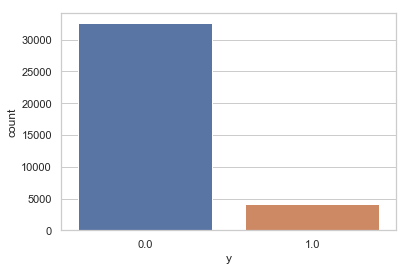

In [10]:
sns.countplot(x='y',data=data)
plt.show()
#plt.savefig('count1_plot')  #will be saved in path

In [11]:
data.groupby('y').mean()  #ppl with 40 age has both 0 and 1 so can't decide (for the target variable y how my independent variable contributes)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.923063,220.697591,2.636244,984.314777,0.132454,0.251205,93.606018,-40.592555,3.813167,5176.139236
1.0,40.828859,552.618888,2.034036,792.370805,0.488255,-1.224377,93.360893,-39.785858,2.128080,5095.213639


In [12]:
data.groupby('job').mean()  #no roll up  

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.159331,254.514671,2.628695,954.226645,0.188134,0.021532,93.538073,-40.260065,3.553364,5164.178490,0.131499
blue-collar,39.560048,264.682912,2.549097,985.022984,0.123466,0.246594,93.657322,-41.370987,3.769349,5175.424789,0.070638
entrepreneur,41.685714,263.957529,2.556757,981.363707,0.138224,0.189730,93.615939,-41.253436,3.826859,5177.673050,0.088803
housemaid,45.673383,251.286320,2.639449,961.084836,0.130435,0.444751,93.678524,-39.438070,4.026985,5180.100848,0.094380
management,42.408116,257.022205,2.475115,962.491960,0.187596,-0.021669,93.520163,-40.468377,3.598331,5166.116080,0.113323
retired,62.029202,274.504218,2.481506,902.944841,0.320571,-0.684945,93.440952,-38.553407,2.782692,5122.254380,0.248540
self-employed,39.929027,261.834131,2.672249,975.220096,0.148325,0.096571,93.560123,-40.435247,3.701405,5170.866427,0.100478
services,37.905317,258.514074,2.599659,979.793574,0.154962,0.180040,93.637565,-41.279898,3.700130,5171.509554,0.082457
student,25.870180,281.380463,2.059126,838.268638,0.529563,-1.437532,93.325116,-40.157326,1.850221,5084.565553,0.318766


In [13]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.886226,253.541273,2.609053,967.503510,0.171629,0.161123,93.609838,-40.701912,3.711868,5170.589760,0.103607
married,42.310926,257.518630,2.576887,968.081099,0.154494,0.186443,93.599134,-40.278491,3.747665,5171.880144,0.101960
single,33.186655,261.796929,2.526844,948.763036,0.212051,-0.165489,93.521256,-40.894090,3.318277,5154.997934,0.141947
unknown,40.453333,303.773333,3.306667,946.146667,0.253333,-0.166667,93.501240,-41.001333,3.375800,5159.781333,0.146667


In [14]:
data.groupby('education').mean()  #university deg ppl less

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.165892,262.615330,2.552885,974.784081,0.142666,0.193479,93.642210,-40.909067,3.732953,5171.971324,0.087368
high.school,37.992780,261.557226,2.567759,964.339212,0.183927,0.030512,93.586294,-40.934904,3.551616,5164.689229,0.110191
illiterate,46.937500,295.562500,2.312500,999.000000,0.062500,0.212500,93.456875,-41.018750,3.848812,5183.725000,0.125000
professional.course,40.105677,253.877738,2.587923,962.068254,0.161599,0.172932,93.571145,-40.141378,3.709313,5170.124729,0.113757
university.degree,38.872846,252.799502,2.569151,951.671519,0.193218,-0.024187,93.496426,-39.976864,3.531214,5163.219571,0.138303
unknown,43.430610,262.642672,2.610246,941.083658,0.223087,0.064591,93.667398,-39.941505,3.570289,5159.379896,0.145914


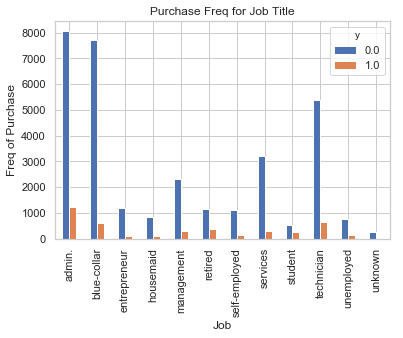

In [15]:
#cross tab ==> different output in same screen  
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')  #cross tab is highly efficient for classification  
plt.title('Purchase Freq for Job Title')
plt.xlabel('Job')
plt.ylabel('Freq of Purchase')
plt.savefig('Job_plot') 

#From the plot it is obvious that admin Job ppl are the max ones to take up the deposit

Text(0, 0.5, 'Purchase')

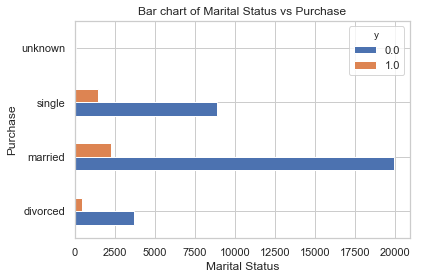

In [16]:
table=pd.crosstab(data.marital,data.y).plot(kind='barh')  #barh for horizontal plot
plt.title('Bar chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Purchase')


Text(0, 0.5, 'Purchase')

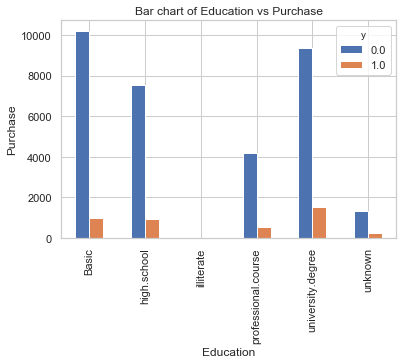

In [17]:
table=pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Bar chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Purchase')


Text(0, 0.5, 'Purchase')

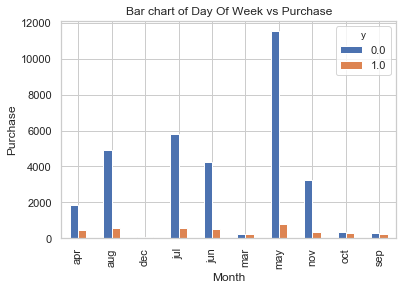

In [18]:
table=pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Bar chart of Day Of Week vs Purchase')
plt.xlabel('Month')
plt.ylabel('Purchase')

#recommending that not to call may is one of the insights

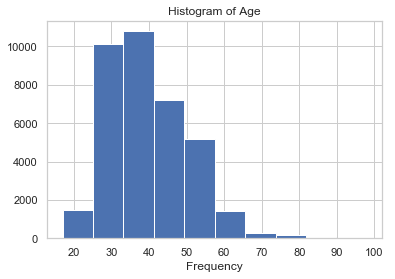

In [19]:
data.age.hist()
plt.title("Histogram of Age")
plt.xlabel('Age')
plt.xlabel('Frequency')
plt.savefig('hist_age')

#so age group from35-42 contacted more

Text(0, 0.5, 'Freq of Purchase')

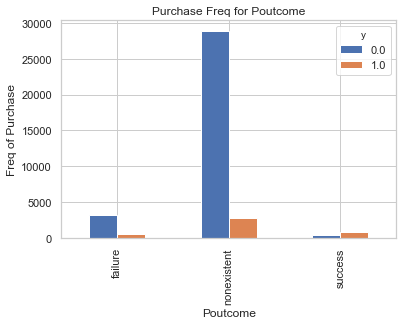

In [20]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Freq for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Freq of Purchase')

In [21]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                 float64
dtype: object

In [22]:
data1 =data.copy() 

In [23]:
for col_name in data1.columns:
    if data1[col_name].dtypes=="object":
        unique_cat=data1[col_name].nunique()     #nan categpry will get eliminated 
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'job' has '12' unique categories
Feature 'marital' has '4' unique categories
Feature 'education' has '6' unique categories
Feature 'default' has '3' unique categories
Feature 'housing' has '3' unique categories
Feature 'loan' has '3' unique categories
Feature 'contact' has '2' unique categories
Feature 'month' has '10' unique categories
Feature 'day_of_week' has '5' unique categories
Feature 'poutcome' has '3' unique categories


In [24]:
dummy_list=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [25]:
def dummy_df(df,dummy_list):
    for e in dummy_list:
        dummies = pd.get_dummies(df[e], prefix=e, dummy_na=False)  #creating dummy for the items so prefix should match the item
        df = df.drop(e,1)
        df = pd.concat([df,dummies],axis=1)
    return df

In [26]:
data1=dummy_df(data1,dummy_list)

In [27]:
data1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339.0,3.0,6.0,2.0,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185.0,2.0,999.0,0.0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137.0,1.0,3.0,1.0,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [28]:
print(list(data1.columns))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutco

In [29]:
#Create dummy in another method
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(data[var],prefix=var)
    data2=data.join(cat_list)
    data=data2
    

In [30]:
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [31]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [32]:
data_final_vars=data_final.columns.values.tolist()    
y=['y']
x=[i for i in data_final_vars if i not in y]

In [33]:
data_final.shape  #initially (36757, 21) now column count changed to 72 

(36757, 62)

In [34]:
data1.shape

(36757, 62)

In [35]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,18)
rfe = rfe.fit(data_final[x],data_final[y])
print(rfe.support_)
print(rfe.ranking_)




[False False False False  True False False False  True False False False
 False False False  True False False  True False False False False False
 False False  True False False False False False  True False False False
 False False False False False False  True  True  True  True False False
  True  True  True  True False False  True False False False  True  True
  True]
[38 36 13 41  1 21 25 23  1 31  5 10 35 16 39  1 12 11  1 28  6 37  2  3
  4 42  1  8 43 14 24 26  1 22 44 40 34 19 20 32 33 27  1  1  1  1  9 17
  1  1  1  1 18  7  1 30 29 15  1  1  1]


In [36]:
Feature_names=[]
for a,b in zip(rfe.ranking_,x):
    if a==1:
        print(a,b)
        Feature_names.append(b)
        
print(Feature_names)        


1 previous
1 euribor3m
1 job_retired
1 job_student
1 education_Basic
1 default_no
1 contact_telephone
1 month_apr
1 month_aug
1 month_dec
1 month_mar
1 month_may
1 month_nov
1 month_oct
1 day_of_week_mon
1 poutcome_failure
1 poutcome_nonexistent
1 poutcome_success
['previous', 'euribor3m', 'job_retired', 'job_student', 'education_Basic', 'default_no', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'day_of_week_mon', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [37]:
REF_list=[]
for a,b in zip(rfe.support_,x):  #here a is either True(Ture Contributor) or Ranking=1  and b is dataframe
    if a==True:
         REF_list.append(b)  
       
print(REF_list)       

['previous', 'euribor3m', 'job_retired', 'job_student', 'education_Basic', 'default_no', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'day_of_week_mon', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [38]:
cols=['previous', 'euribor3m', 'job_retired', 'job_student', 'education_Basic', 'default_no', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'day_of_week_mon', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']
X=data_final[cols]
Y=data_final['y']

In [39]:
import statsmodels.api as sm
# logit_model = sm.Logit(Y,X)   #whether it is Logit or OLS parameter sequence is dependent first follwed by independent
# result = logit_model.fit()
logit_model = sm.Logit(Y,X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.283025
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36757
Model:                          Logit   Df Residuals:                    36739
Method:                           MLE   Df Model:                           17
Date:                Sun, 05 May 2019   Pseudo R-squ.:                  0.2000
Time:                        11:50:20   Log-Likelihood:                -10403.
converged:                       True   LL-Null:                       -13004.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2009      0.054      3.708      0.000       0.095       0.307

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
y_pred=logreg.predict(X_test)

In [45]:
print("Accuracy classifier on test set: {:.2f} ".format(logreg.score(X_test,Y_test)))  #accuracy not error check as we know to check accuracy we have to expose x_test and check y_test

Accuracy classifier on test set: 0.90 


In [46]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()

scoring='accuracy'
results=model_selection.cross_val_score(modelCV,X_train,Y_train,cv=kfold,scoring=scoring)

print("10-fold cross validation avaerage accuracy:%.3f" %(results.mean()))

10-fold cross validation avaerage accuracy:0.898


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)    #==>correct predictions=(9708-->TP)(223-->TN) and wrong predictions=(997-->FP)(100-->FN)

[[9708  100]
 [ 997  223]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      9808
         1.0       0.69      0.18      0.29      1220

   micro avg       0.90      0.90      0.90     11028
   macro avg       0.80      0.59      0.62     11028
weighted avg       0.88      0.90      0.87     11028

